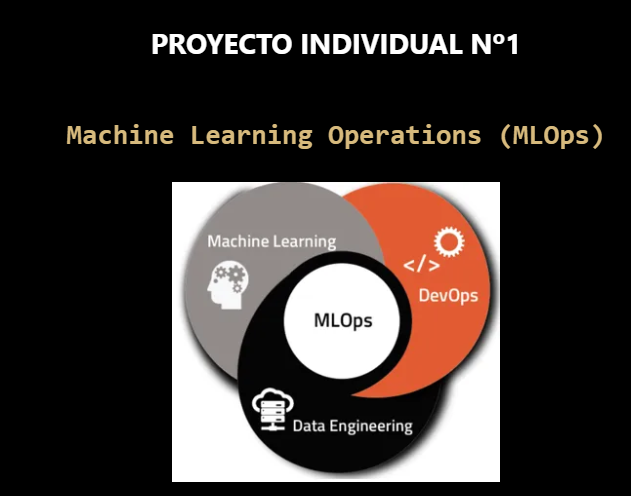

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import ast


In [3]:
df = pd.read_csv('./DataSet/movies_dataset.csv' )
Clone_df = df.copy()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_16992\1442696545.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./DataSet/movies_dataset.csv' )


In [4]:
df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

# 1- Transformaciones DF

#### A-) Algunos campos, como belongs_to_collection, production_companies y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos para poder y unirlos al dataset de nuevo hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos.

In [6]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [7]:
# Un diccionario que indica a que franquicia o serie de películas pertenece la película
df['belongs_to_collection'] = df['belongs_to_collection'].fillna("[]").apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else 0)
df['belongs_to_collection']

0                  Toy Story Collection
1                                     0
2             Grumpy Old Men Collection
3                                     0
4        Father of the Bride Collection
                      ...              
45461                                 0
45462                                 0
45463                                 0
45464                                 0
45465                                 0
Name: belongs_to_collection, Length: 45466, dtype: object

In [8]:
# creamos un listado de tipos de genero en Genero
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [9]:
# colocamos el idioma de la pelicula
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [10]:
# colocamos pais de la productora de la pelicula
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [11]:
# colocamos el paises donde de produjo la pelicula
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [12]:
df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
1,False,0,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


#### B-) Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.

In [13]:
print(f'Antes: {df["revenue"].isnull().sum()}')
df["revenue"] = df["revenue"].fillna(0) 
print(f'Después: {df["revenue"].isnull().sum()}')

Antes: 6
Después: 0


In [14]:
print(f'Antes: {df["budget"].isnull().sum()}')

Antes: 0


In [15]:
df["adult"].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [16]:
df = df.drop(df[df["adult"] == ' - Written by Ørnås'].index)
df = df.drop(df[df["adult"] == ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.'].index)
df = df.drop(df[df["adult"] == ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'].index)

In [17]:
df["adult"].unique()

array(['False', 'True'], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  45463 non-null  object 
 2   budget                 45463 non-null  object 
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  object 
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45376 non-null  object 
 15  revenue

In [19]:

print(f'Antes: {df["budget"].isnull().sum()}')
df["budget"].unique()
df["budget"] = pd.to_numeric(df["budget"] , downcast="float" )

Antes: 0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  45463 non-null  object 
 2   budget                 45463 non-null  float64
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  object 
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45376 non-null  object 
 15  revenue

#### C-) De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

In [21]:
df["release_date"].isnull().sum()

87

In [22]:
# Eliminamos las filas que tengan nulos en la columna release_date
df = df.dropna(subset=['release_date'])

In [23]:
df["release_date"].isnull().sum()

0

In [24]:
 
df["release_date"] = pd.to_datetime(df["release_date"])

In [25]:
df["release_date"].head(2)

0   1995-10-30
1   1995-12-15
Name: release_date, dtype: datetime64[ns]

In [26]:
df["release_year"] = df["release_date"].dt.year
df["release_year"] = df["release_year"].fillna(0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45376 non-null  object        
 1   belongs_to_collection  45376 non-null  object        
 2   budget                 45376 non-null  float64       
 3   genres                 45376 non-null  object        
 4   homepage               7766 non-null   object        
 5   id                     45376 non-null  object        
 6   imdb_id                45362 non-null  object        
 7   original_language      45365 non-null  object        
 8   original_title         45376 non-null  object        
 9   overview               44435 non-null  object        
 10  popularity             45376 non-null  object        
 11  poster_path            45037 non-null  object        
 12  production_companies   45376 non-null  object        
 13  produc

#### D- ) Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

In [28]:
condicion = [(df["revenue"] == 0 ), (df["budget"] == 0 ) ]
resultado = [0, 0, ] # df["revenue"]//df["budget"]

In [29]:
df["return"] = np.select(condicion, resultado, default= df["revenue"]//df["budget"]) 
 
df["return"].isnull().sum()

0

In [30]:
df["revenue"]

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
45460            0.0
45462            0.0
45463            0.0
45464            0.0
45465            0.0
Name: revenue, Length: 45376, dtype: float64

In [31]:
df[["revenue","budget","return"]]


,revenue,budget,return
0,373554033.0,30000000.0,12.0
1,262797249.0,65000000.0,4.0
2,0.0,0.0,0.0
3,81452156.0,16000000.0,5.0
4,76578911.0,0.0,0.0
...,...,...,...
45460,0.0,0.0,0.0
45462,0.0,0.0,0.0
45463,0.0,0.0,0.0
45464,0.0,0.0,0.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45376 non-null  object        
 1   belongs_to_collection  45376 non-null  object        
 2   budget                 45376 non-null  float64       
 3   genres                 45376 non-null  object        
 4   homepage               7766 non-null   object        
 5   id                     45376 non-null  object        
 6   imdb_id                45362 non-null  object        
 7   original_language      45365 non-null  object        
 8   original_title         45376 non-null  object        
 9   overview               44435 non-null  object        
 10  popularity             45376 non-null  object        
 11  poster_path            45037 non-null  object        
 12  production_companies   45376 non-null  object        
 13  produc

#### F- ) Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,vote_count,poster_path y homepage.



In [33]:
df = df.drop(columns= ["video", "imdb_id", "adult", "original_title", "vote_count", "poster_path", "homepage" ])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45376 non-null  object        
 1   budget                 45376 non-null  float64       
 2   genres                 45376 non-null  object        
 3   id                     45376 non-null  object        
 4   original_language      45365 non-null  object        
 5   overview               44435 non-null  object        
 6   popularity             45376 non-null  object        
 7   production_companies   45376 non-null  object        
 8   production_countries   45376 non-null  object        
 9   release_date           45376 non-null  datetime64[ns]
 10  revenue                45376 non-null  float64       
 11  runtime                45130 non-null  float64       
 12  spoken_languages       45376 non-null  object        
 13  status

In [34]:
df.head(2)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
0,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,7.7,1995,12.0
1,0,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.0


In [35]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'release_year', 'return'],
      dtype='object')

#### G- ) Crear un nuevo csv con el DataFrame Normalizado

In [36]:
df.to_csv("./DataSet/movies_dataset_normalizado.csv", index= False)


In [37]:
df = pd.read_csv('./DataSet/movies_dataset_normalizado.csv' )
df.head(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.0,81.0,['English'],Released,NaN,Toy Story,7.7,1995,12.0
1,0,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.0,104.0,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.0
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,0.0,101.0,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,0.0
3,0,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,81452156.0,127.0,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,1995,5.0
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,76578911.0,106.0,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,1995,0.0
